# Ford GoBike Dataset Exploration
### by Mercy Solomon

## Table of Contents
- [Introduction](#intro)
- [Prelimnary Wrangling](#wrangling)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Conclusions](#conclusion)

## Introduction
<a id='intro'></a>
> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the duration of Febraury 2019.

## Preliminary Wrangling
<a id='wrangling'></a>

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [6]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')


In [7]:
print(df.shape)
print(df.head(10))
print(df.dtypes)

(183412, 16)
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6          1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7          1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8          1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9          1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at 

In [8]:
#checking for duplicates
sum(df.duplicated())

0

In [9]:
#checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
#dropping the rows with null values
df.dropna(axis=0, how='any', inplace=True)

In [11]:
#defining a function to change columns to type datetime.
def col_date(column):
    df[column] = pd.to_datetime(df[column])
    
col_date('start_time')
col_date('end_time')

In [12]:
##defining a function to change columns to type integer.
def col_int(column):
    df[column] = df[column].astype('int')
    
col_int('start_station_id')
col_int('end_station_id')
col_int('member_birth_year')

In [13]:
##defining a function to change columns to type category.
def col_cat(column):
    df[column] = df[column].astype('category')
    
col_cat('user_type')
col_cat('member_gender')
col_cat('bike_share_for_all_trip')

In [14]:
#adding new columns to the dataframe to allow for more observations.
df['start_weekdays'] = df['start_time'].dt.weekday
df['start_hour'] = df['start_time'].dt.hour
df['duration_min'] = df['duration_sec']/60
df.drop(columns=['duration_sec'], inplace=True)
df['member_age'] = df['member_birth_year'].map(lambda x: 2019 - x)

In [15]:
print(df.shape)
print(df.sample(10))
print(df.dtypes)

(174952, 19)
                    start_time                end_time  start_station_id  \
178620 2019-02-01 16:35:25.085 2019-02-01 16:52:51.748                67   
163237 2019-02-05 09:24:00.312 2019-02-05 09:37:46.147               284   
137311 2019-02-08 08:53:47.227 2019-02-08 08:56:18.724                15   
101714 2019-02-14 17:20:54.130 2019-02-14 17:25:32.140               243   
98573  2019-02-15 07:32:51.679 2019-02-15 07:38:47.437                66   
8488   2019-02-28 08:22:35.239 2019-02-28 08:28:04.668                21   
115685 2019-02-12 08:32:05.424 2019-02-12 08:38:04.663                80   
107090 2019-02-13 16:57:02.814 2019-02-13 17:08:22.676               243   
164223 2019-02-05 08:40:36.945 2019-02-05 08:45:26.669               258   
140102 2019-02-07 19:34:37.554 2019-02-07 19:45:40.083                23   

                                       start_station_name  \
178620  San Francisco Caltrain Station 2  (Townsend St...   
163237  Yerba Buena Center f

In [77]:
#defining a function for the labels and title to avoid messiness.
def x_y_t(xL, yL, title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(title)
color = sb.color_palette()[0]

## Univariate Exploration
<a id='univariate'></a>


I'll start by plotting the duration minutes since it is my main variable of interest.

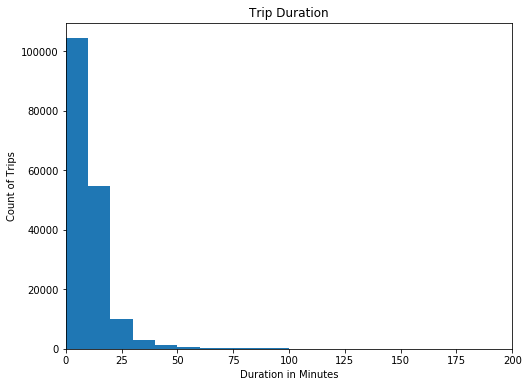

In [56]:
binsize = 10
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df, x = 'duration_min', bins = bins)
x_y_t('Duration in Minutes', 'Count of Trips', 'Trip Duration')
plt.xlim(0, 200)
plt.show()

This plot shows that most of the bike rides were less than 25 minutes long and with the duration_min column having a mean of 11 minutes, this claim is founded.

In [17]:
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

### What day of the week is the service often used? 

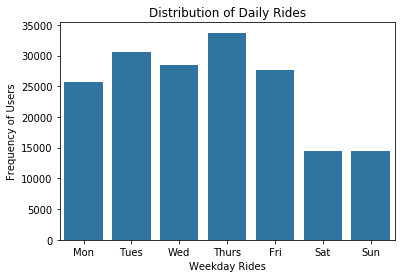

In [57]:
base_color = sb.color_palette()[0];
ax = sb.countplot(data=df, x='start_weekdays',color=base_color);
# plt.xticks(np.arange(1, 7 + 1), weekday_labels)
x_y_t('Weekday Rides', 'Frequency of Users', 'Distribution of Daily Rides')           
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);

This chart tells us that weekdays saw an influx of rides more than weekends with Thursday churning the highest number of rides.

### Which are the top 10 starting and ending destination stations with more traffic?

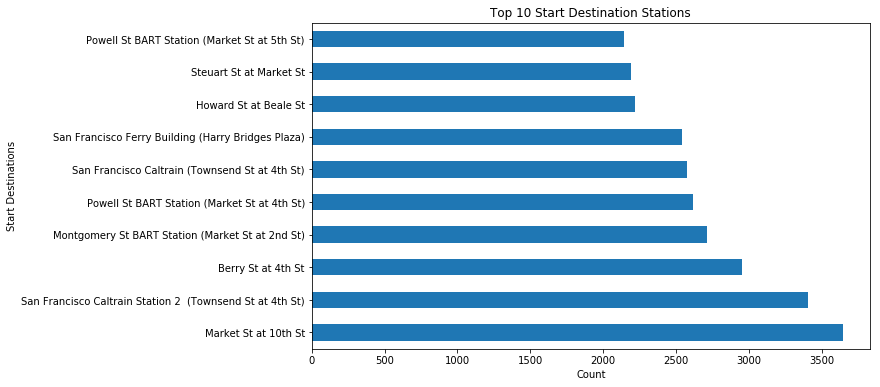

In [58]:
#Starting destinations
plt.figure(figsize =(10,6))
default_color = sb.color_palette()[0]
x_y_t('Count', 'Start Destinations','Top 10 Start Destination Stations');
df.start_station_name.value_counts().head(10).plot(kind='barh', color=default_color);
    

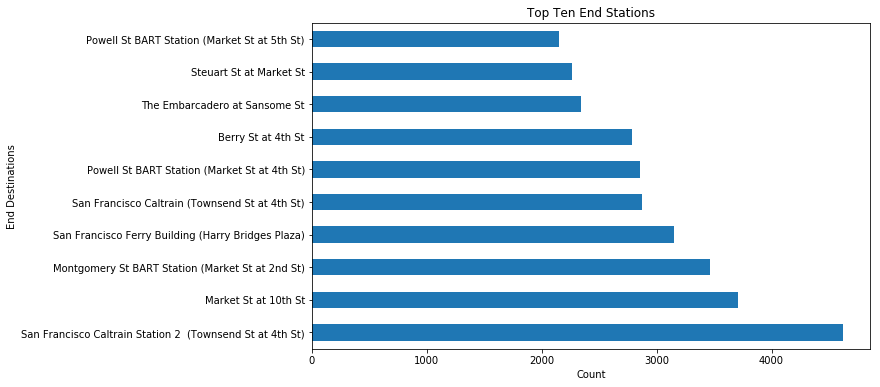

In [59]:
#End stations
plt.figure(figsize=(10,6))
df.end_station_name.value_counts().head(10).plot(kind='barh', color=default_color);
x_y_t('Count', 'End Destinations', 'Top Ten End Stations');

As seen above, these are the top ten start and end destinations that had more traction. For the start stations, Market St at 10th St has the most traffic and for the end stations, San Francisco Caltrain Station 2.

### What is the age distribution of the users?

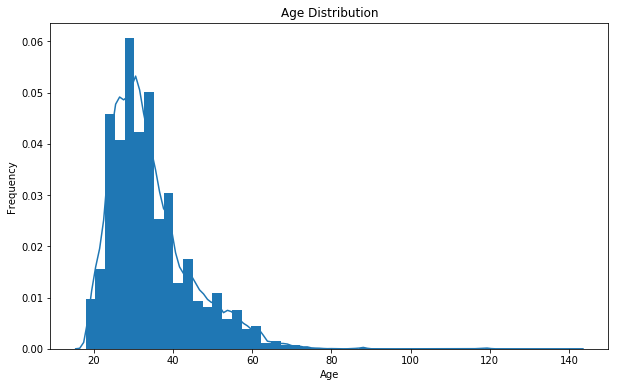

The mean age of this distribution is  34.1968654259


In [60]:
plt.figure(figsize=[10,6])
sb.distplot(df['member_age'], hist_kws = {'alpha' : 1});
x_y_t('Age', 'Frequency', 'Age Distribution')
plt.show()
print("The mean age of this distribution is ", df.member_age.mean())


The rideshare app has a fair number of young users with the mean being 34 and most users falling between the age(s) 20-40.

### What is the gender distribution of the users?

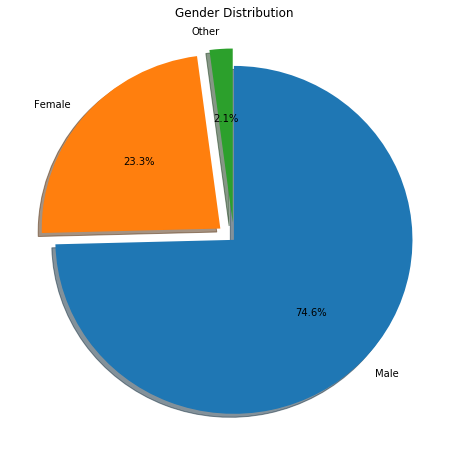

In [22]:
plt.figure(figsize=(8,8))
count = df['member_gender'].value_counts()
plt.pie(count, labels = ['Male','Female','Other'], startangle = 90, explode =(0 , 0.1, 0.1), autopct= '%1.1f%%',shadow=True, counterclock = False);
plt.title('Gender Distribution');

This is a pretty explanatory chart showing that Males make up 74.6% of users while Females make up 23.3% with Other taking up the remaining 2.1%. The ride share platform definitely has more males as users.

### What is the user type distribution?

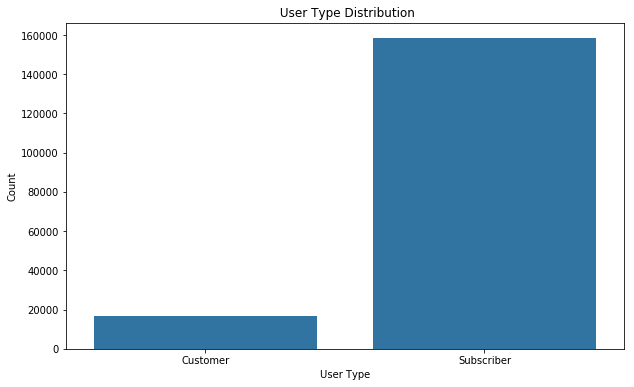

In [61]:
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color);
x_y_t('User Type', 'Count', ' User Type Distribution');

Here we see that a greater number of users in the dataset are subscribed to the bike share service.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All variables of interest were unimodal. For the age variable, though, I noticed there were outliers like a user being 140 years of age. This could be due to an error during data entry.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Because of how large the dataset is, I had to consider just the top ten routes for the start and end destinations as plotting everything at once would have caused an uninterpretable cluster of data.

## Bivariate Exploration
<a id='bivariate'></a>

### Is there any correlation between member_age and duration_min?

The correlation for the age and duration column is : 0.00604117487525


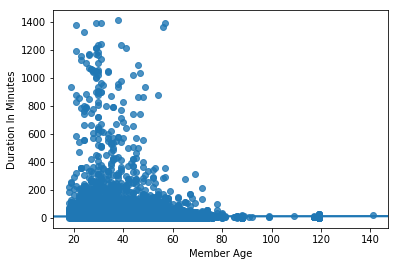

In [63]:
x = df.member_age
y = df.duration_min
sb.regplot(data = df, x = x, y = y);
x_y_t('Member Age', 'Duration In Minutes', '')
print("The correlation for the age and duration column is :", df['member_age'].corr(df.duration_min))

This plot shows that users ages 20-40 had the most duration in minutes and as shown in the univariate distribution of age, this is consistent with the age range of the youngest users.

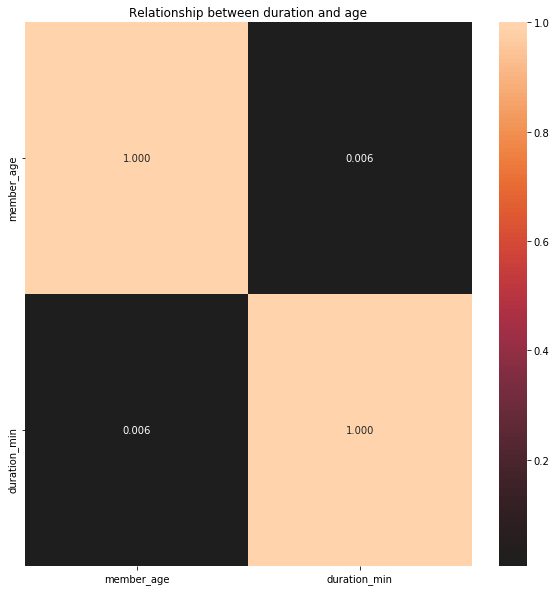

In [25]:
# Plotting a heatmap of same above variables to show clarity.
vars = ['member_age', 'duration_min']

plt.figure(figsize = [10 , 10])
sb.heatmap(df[vars].corr(), annot = True, fmt = '.3f', center = 0)
plt.title('Relationship between duration and age')
plt.show()

### Does gender have anything to do with duration of the trip?

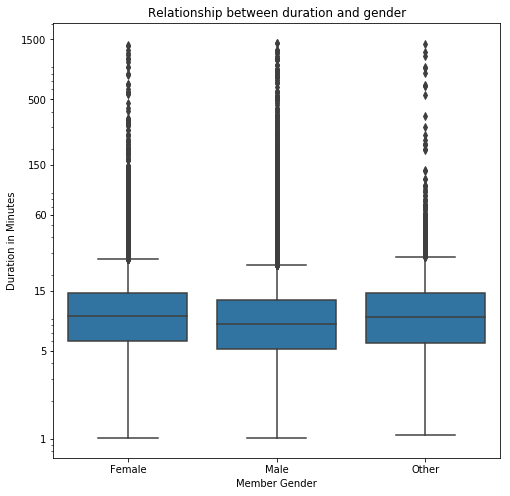

In [64]:
#Since the dataset is large, I'll use a large sample of 100k values instead to avoid clustering.
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize=(8, 8))
samples = np.random.choice(df.shape[0], 100000, replace = False);
df_sample = df.iloc[samples,:];
base_color = sb.color_palette()[0]
plt.yscale('log')
sb.boxplot(data = df_sample, x = 'member_gender', y = 'duration_min', color = base_color )
x_y_t('Member Gender', 'Duration in Minutes', 'Relationship between duration and gender')
plt.yticks([1, 5, 15 , 60 , 150 , 500 , 1500] , [1, 5, 15 , 60 , 150 , 500 , 1500])
plt.show()

There really isnt much difference in duration of minutes with respect to gender.

### What is the average trip duration per hour?

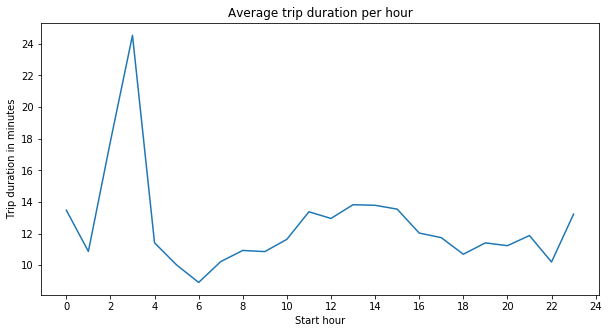

In [65]:
# plotting line chart to find peak times 
df.groupby('start_hour')['duration_min'].mean().plot(kind='line', figsize=(10,5))
x_y_t('Start hour', 'Trip duration in minutes', 'Average trip duration per hour')
plt.xticks([x for x in range(0, 25, 2)]);
plt.show()

This is a distribution of the average trip duration per hour and we see a peak in the early hours and subsequent decline as the day goes by.

### Is there any relationship between gender and bike share for all trips?

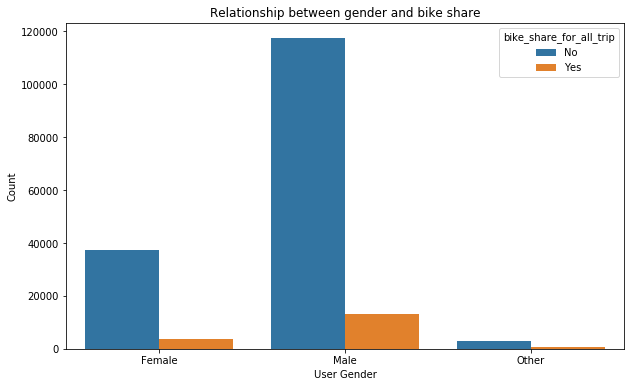

In [66]:
plt.figure(figsize=[10,6])
sb.countplot(data=df, x='member_gender', hue='bike_share_for_all_trip');
x_y_t('User Gender', 'Count', 'Relationship between gender and bike share');

This clustered bar chart shows that males were more likely to participate in the bike share program than females.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The feature of interest when combined with other features of interest seemed to work hand in hand.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Even though most of the features in this dataset work independently of each other, I observed some interesting relationships between a few.

## Multivariate Exploration
<a id='multivariate'></a>

### How does the start hour relate to the user type and trip duration?

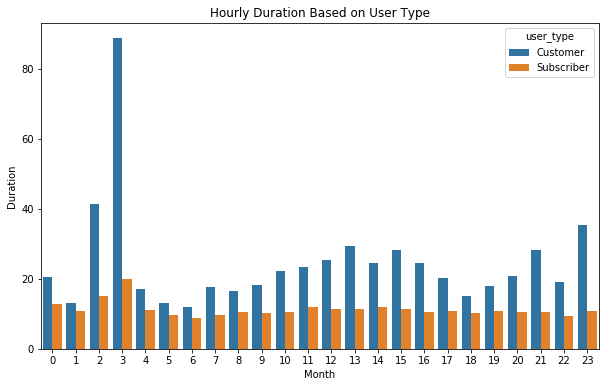

In [69]:
plt.figure(figsize=(10,6))
chart = sb.barplot(data=df, x='start_hour', y='duration_min', hue='user_type', ci=None)
x_y_t('Month', 'Duration', 'Hourly Duration Based on User Type')

This chart shows that customers have a higher start hour duration than subscribers and this is a bit surprising seeing as subscribers make up more of the user type.

### What is the relationship between gender, age and trip duration?

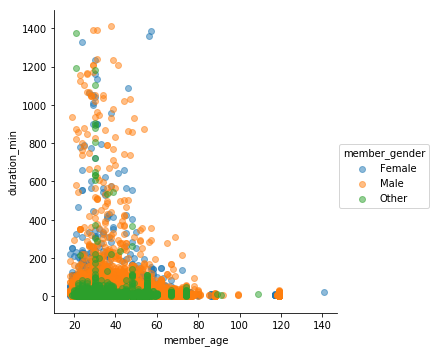

In [76]:
plt.figure(figsize=(10,6));
g = sb.FacetGrid(data = df, hue = 'member_gender', size = 5);
g.map(plt.scatter, 'member_age', 'duration_min', alpha=0.5);
g.add_legend();

There is no clear relationship to be deduced here as the variables seem to be independent of each other.

### What is the relationship between trip duration, gender and bike share for all trip?

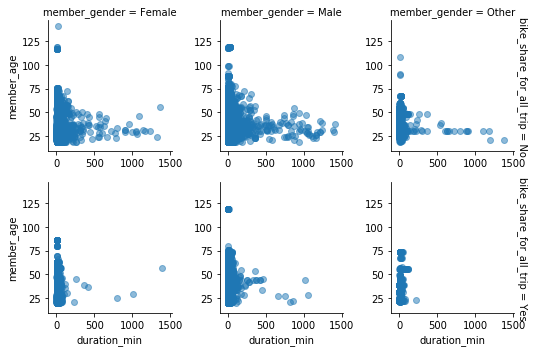

In [49]:
g = sb.FacetGrid(data = df, col = 'member_gender', row='bike_share_for_all_trip', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'duration_min', 'member_age', alpha=1/2);

This chart confirms that women were less likely to share bikes for all trip irrespective of their age.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> These features are independent of each other so there's really no way to tell how they relate or strengthen each other.

### Were there any interesting or surprising interactions between features?
> I found out that the user gender has an influence on the bike share for all trip feature, and user type has an influence on hours of service.

## Conclusions
<a id='conclusion'></a>
>This was an interesting dataset with amazing observations even though this data was for just a month. Before performing analysis on the dataset, I wrangled the data and deleted rows with null values, changed the data types for some columns and added new columns to the dataframe.

Some of the findings I got are:
- Males make up 74.6 of the users while femsales make up 23.3%.
- Males are more likely to share bikes for all trip than females.
- Most of the users are between the ages 20-40.
- There are more rides recorded during the weekday than the weekends.

References: 
    - https://github.com/Saud911/Ford-Go-Bike-Project
    - www.kaggle.com
    

In [22]:
#saving the csv with the new columns for explanatory analysis
df.to_csv('new_df.csv', index=None)
pd.read_csv('new_df.csv')


,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_weekdays,start_hour,duration_min,member_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,3,17,869.750000,35
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,3,12,1030.900000,47
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,3,17,608.166667,30
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,3,23,26.416667,45
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,3,23,29.883333,60
5,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,3,23,19.116667,36
6,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,3,23,26.916667,30
7,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,3,23,26.166667,31
8,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,3,23,17.483333,27
9,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,3,23,7.633333,23
